In [18]:
from collections import defaultdict
import glob
import json
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [22]:
idir = './new_to_train4'

trn_files = 'datalists/ntt4_trn.json'
val_files = 'datalists/ntt4_val.json'
with open(trn_files, 'r') as f:
    trn_list = json.load(f)
with open(val_files, 'r') as f:
    val_list = json.load(f)

print(len(trn_list), len(val_list))

282 70


In [51]:

varnames = ['sir_eqs', 'sir_log', 'rfs_eqs', 'rfs_uni', 'mss_eqs', 'mss_uni', 'sir', 'rfs', 'mss', 'labels']
wss = ['0250', '0500', '1000', '2000', '4000']
def read_data(trn_list, step):
    data = defaultdict(list)
    arrays = dict()
    for trn_file in tqdm(trn_list[::step]):
        with Dataset(f'{idir}/{trn_file}', 'r') as trn:
            for varname in varnames:
                for ws in wss:
                    key = varname+ws
                    array = trn[key][:]
                    data[key].append(array.compressed())
                    if key not in arrays:
                        arrays[key] = np.zeros((3000, 3000)) + 255
                    cols, rows = np.nonzero(array.mask == False)
                    arrays[key][cols, rows] = array.compressed()
    for varname in data.keys():
        data[varname] = np.concatenate(data[varname])
    return data, arrays

trn_data, trn_arrays = read_data(trn_list, 3)
val_data, val_arrays = read_data(val_list, 1)


  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

sir_eqs0250


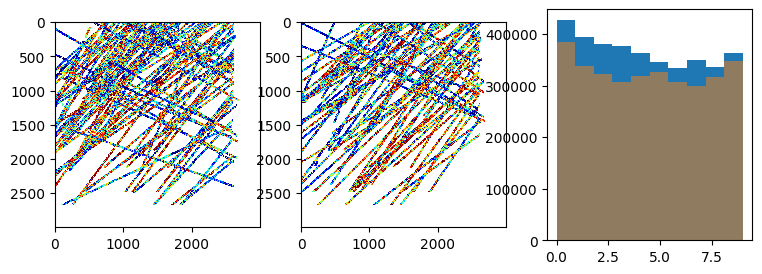

sir_eqs0500


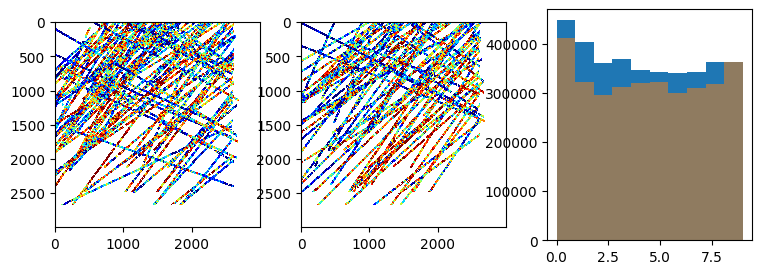

sir_eqs1000


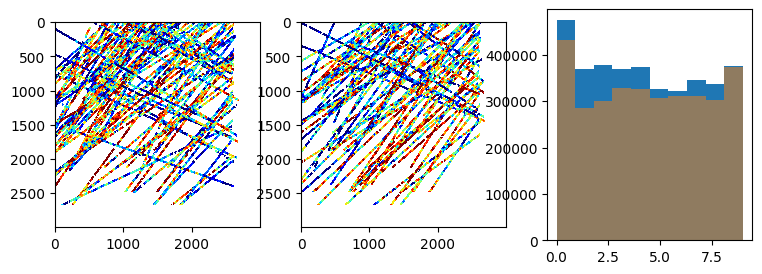

sir_eqs2000


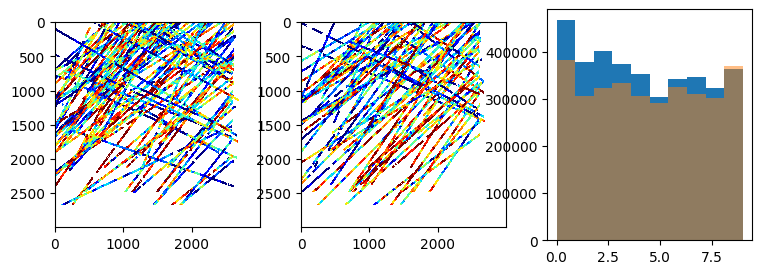

sir_eqs4000


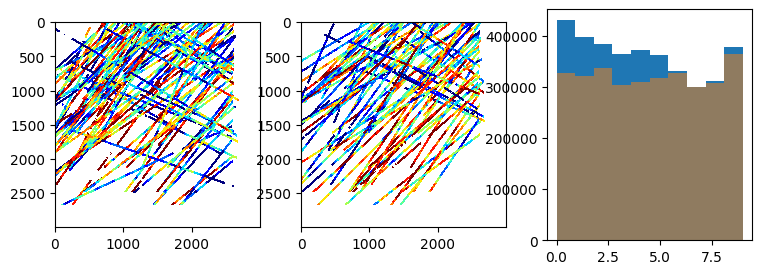

sir_log0250


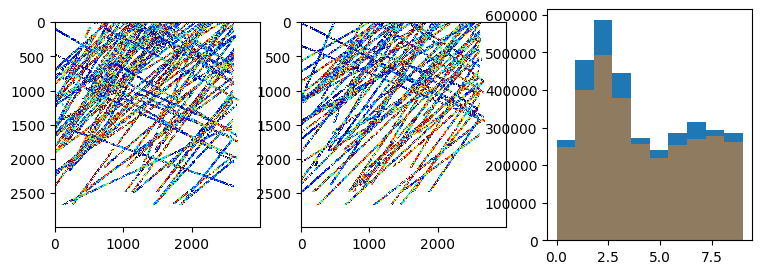

sir_log0500


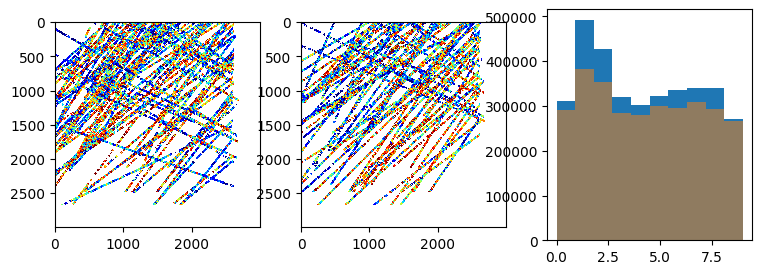

sir_log1000


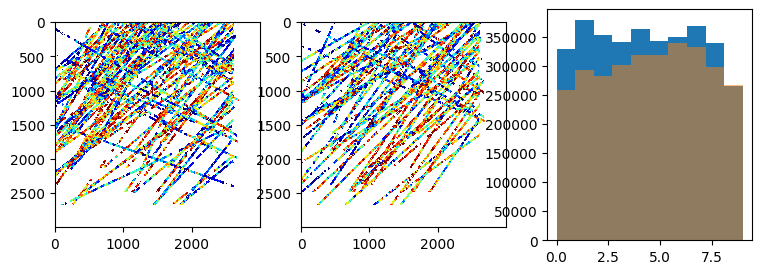

sir_log2000


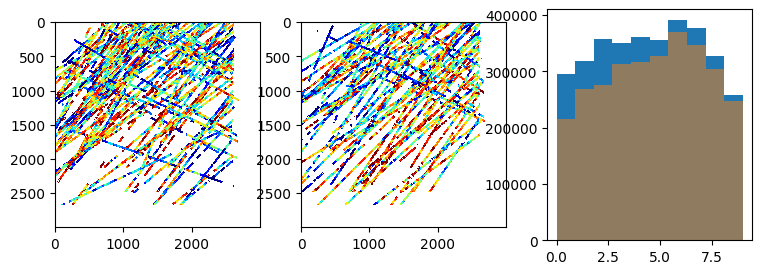

sir_log4000


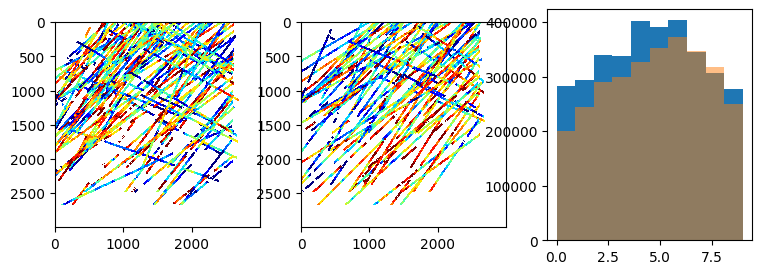

rfs_eqs0250


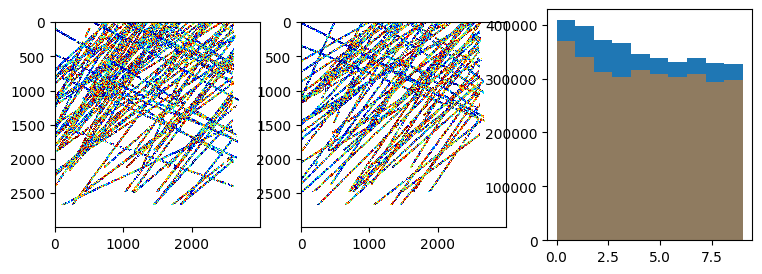

rfs_eqs0500


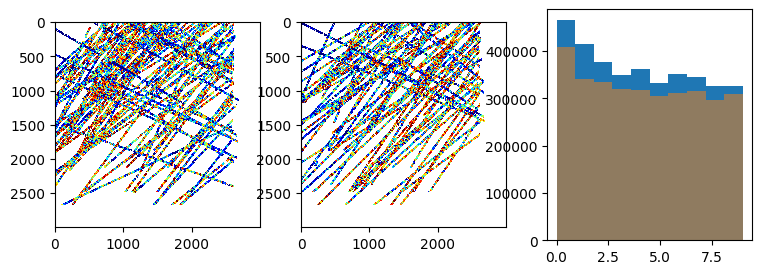

rfs_eqs1000


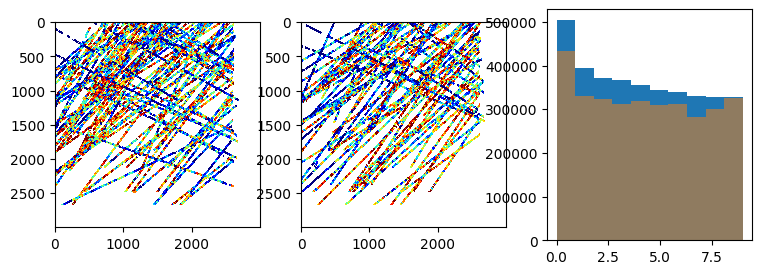

rfs_eqs2000


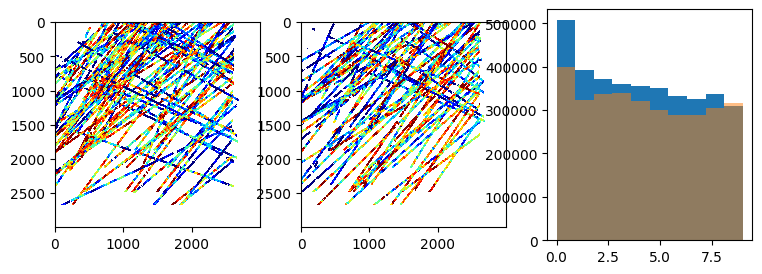

rfs_eqs4000


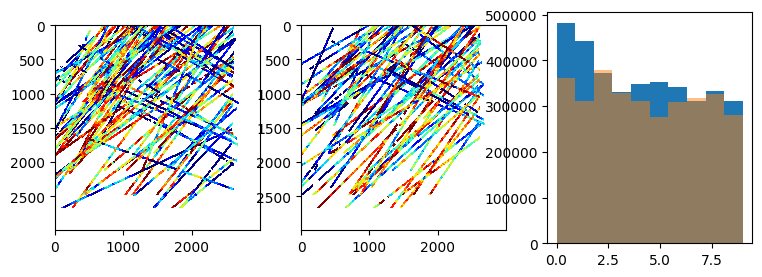

rfs_uni0250


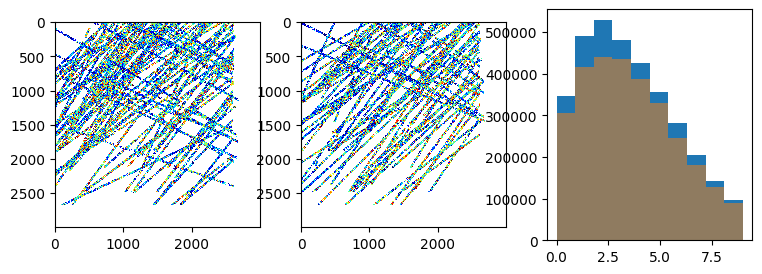

rfs_uni0500


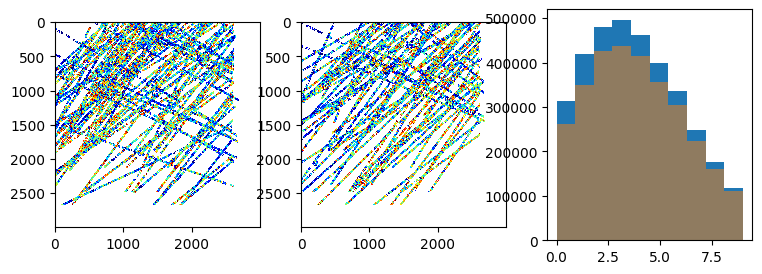

rfs_uni1000


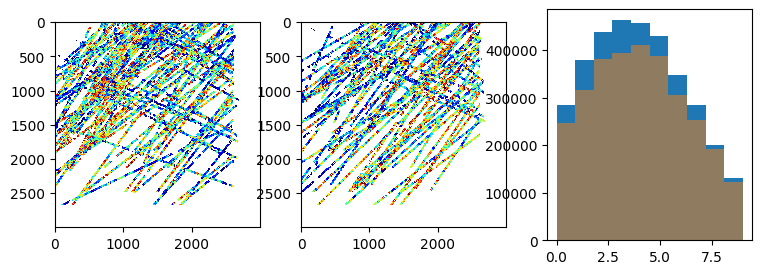

rfs_uni2000


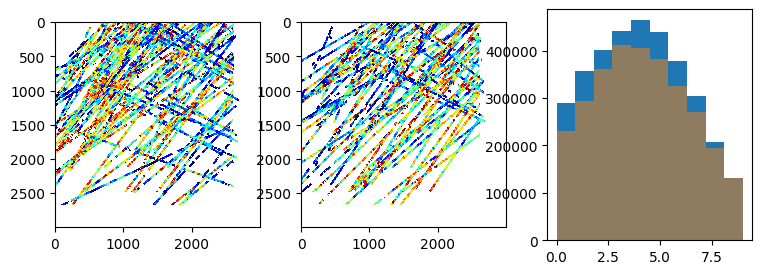

rfs_uni4000


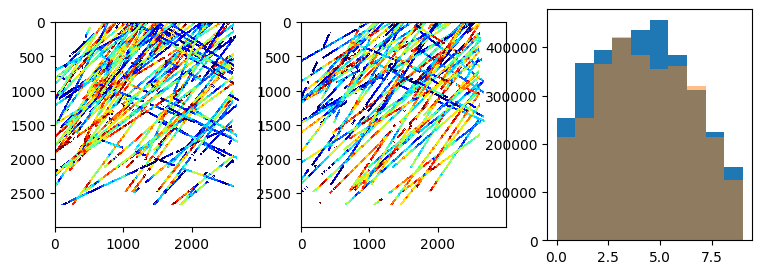

mss_eqs0250


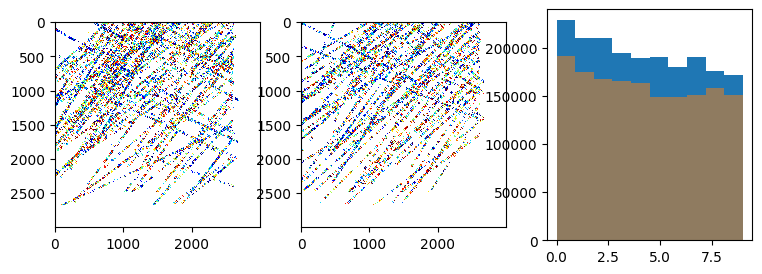

mss_eqs0500


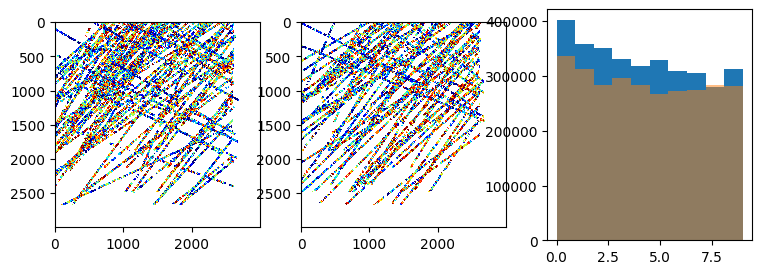

mss_eqs1000


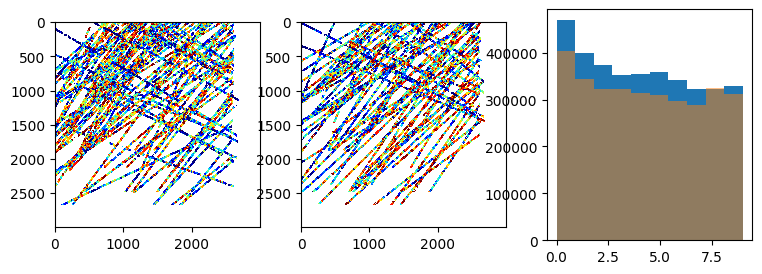

mss_eqs2000


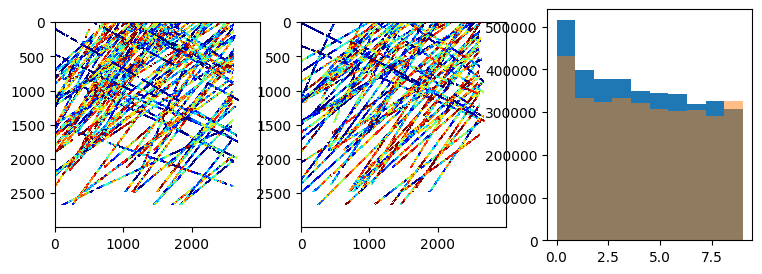

mss_eqs4000


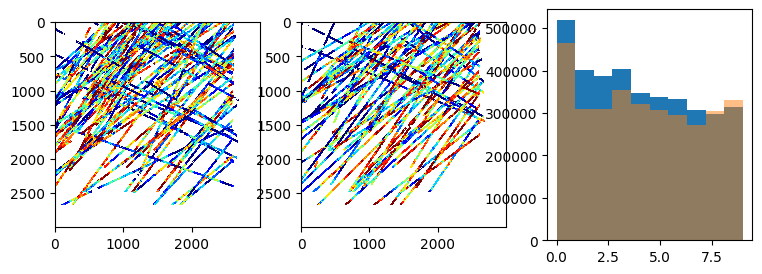

mss_uni0250


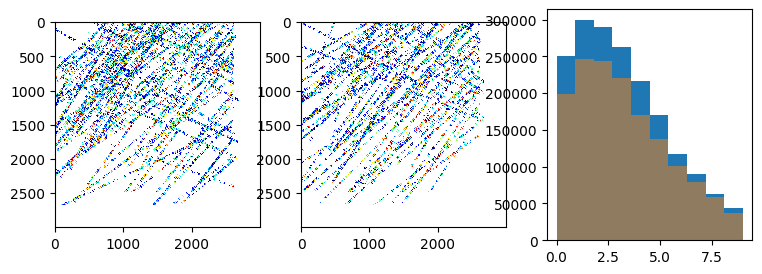

mss_uni0500


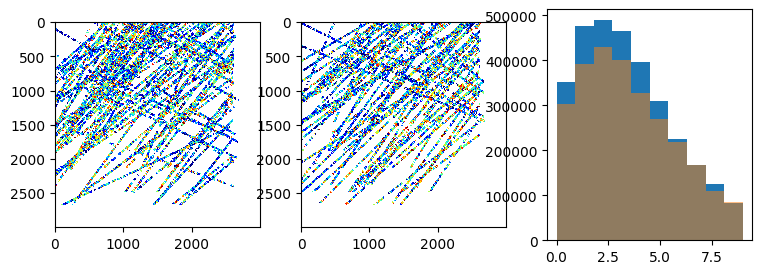

mss_uni1000


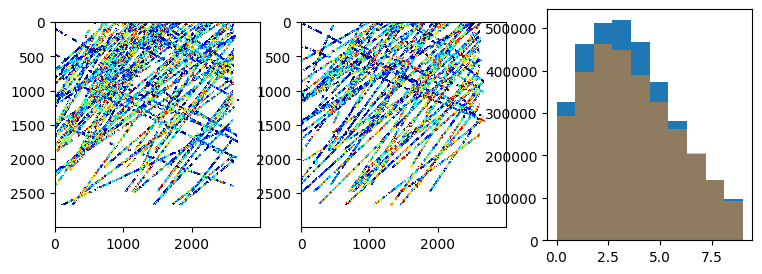

mss_uni2000


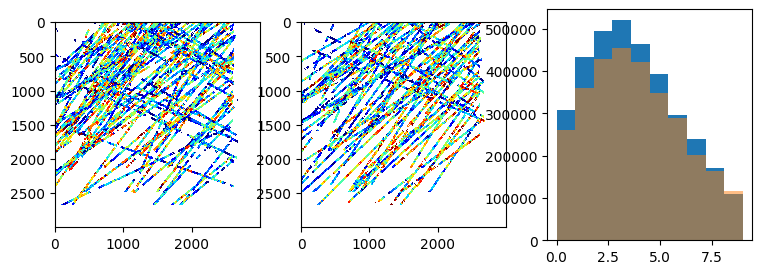

mss_uni4000


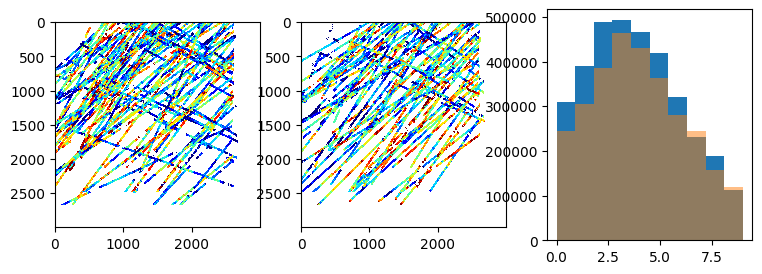

sir0250


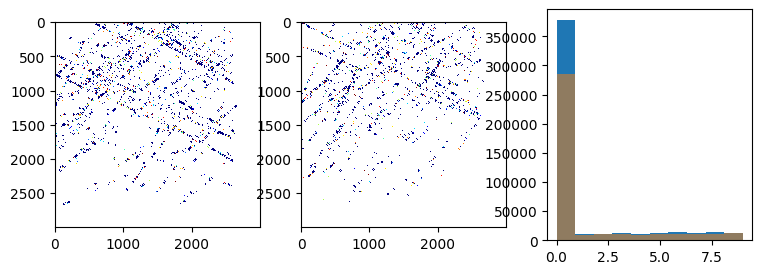

sir0500


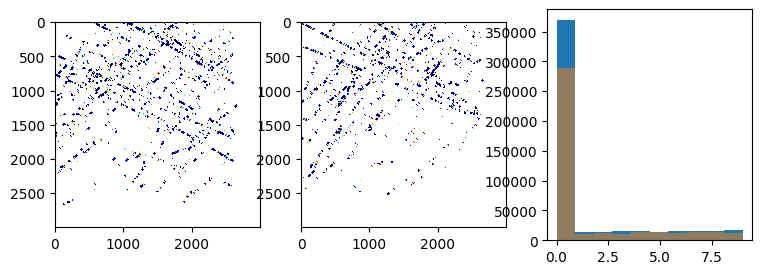

sir1000


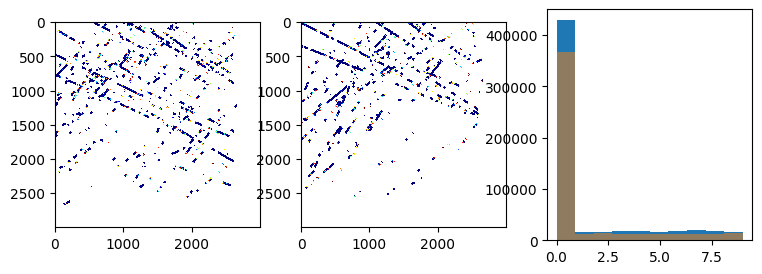

sir2000


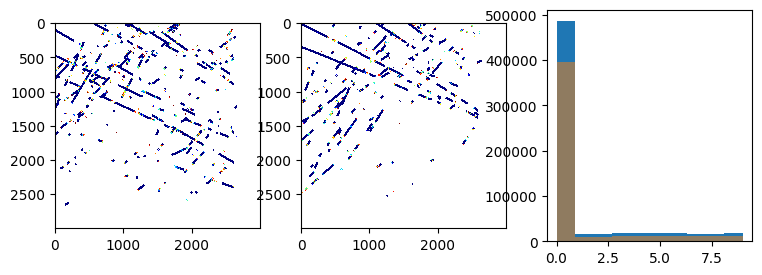

sir4000


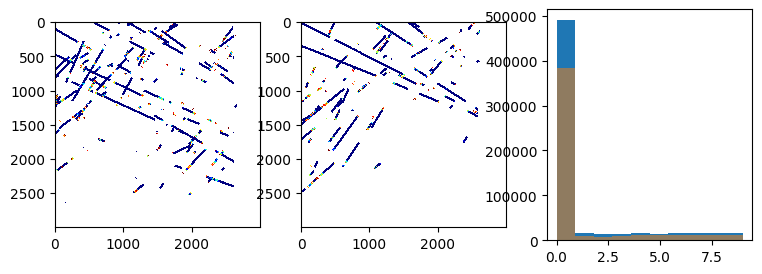

rfs0250


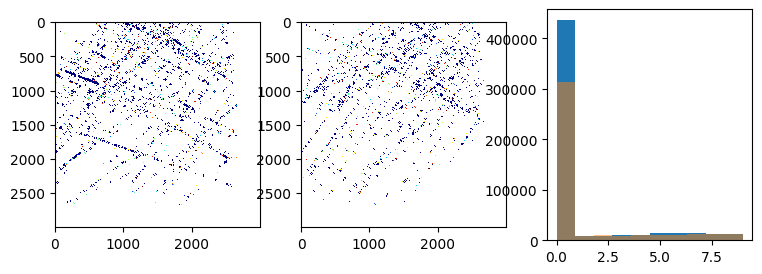

rfs0500


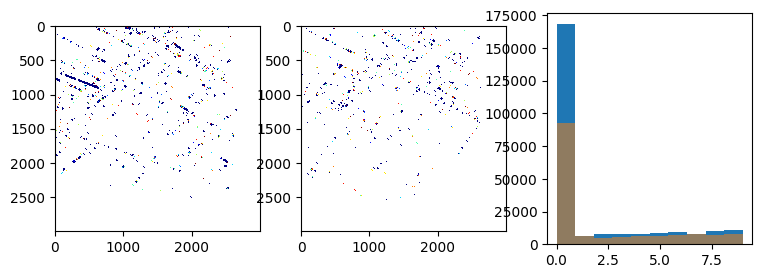

rfs1000


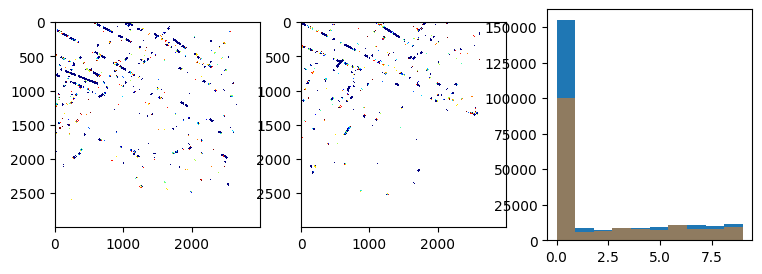

rfs2000


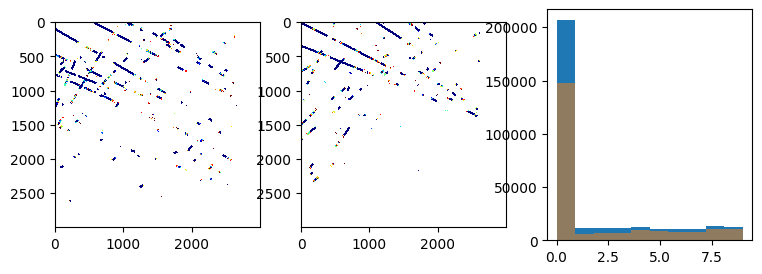

rfs4000


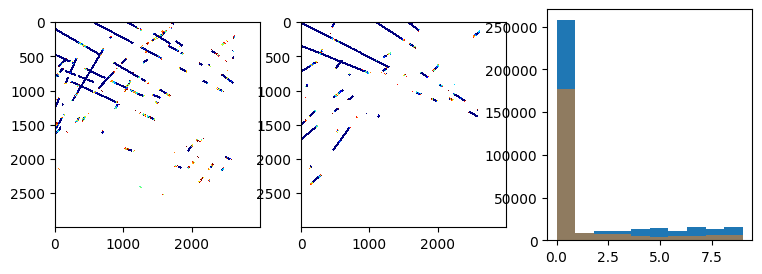

mss0250


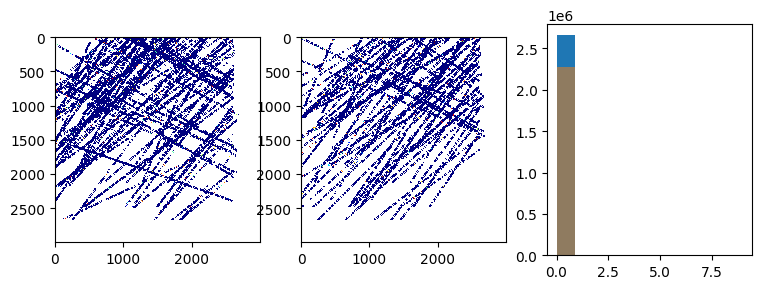

mss0500


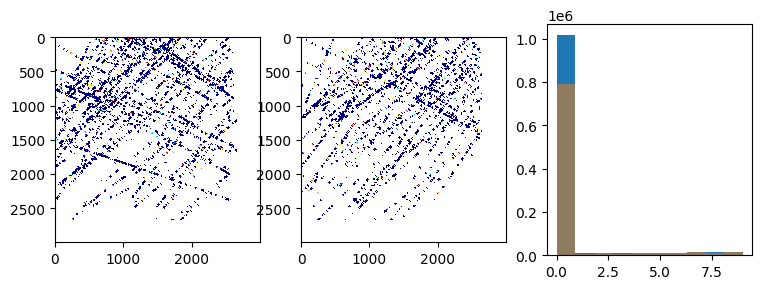

mss1000


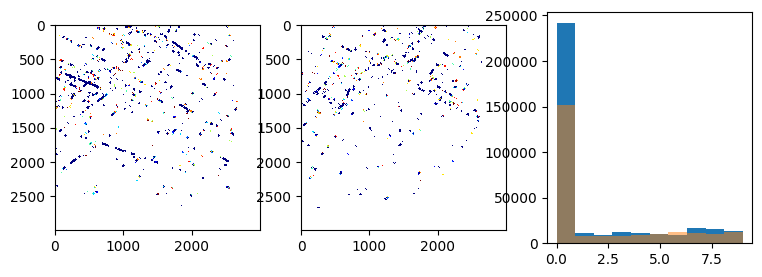

mss2000


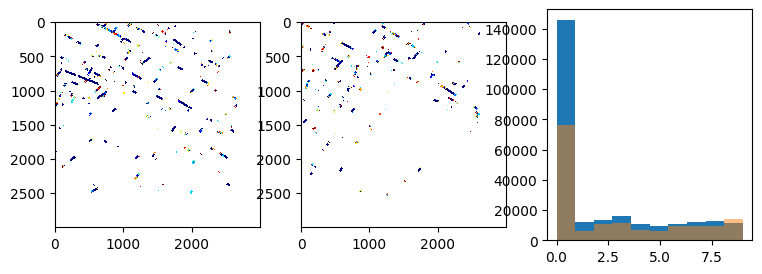

mss4000


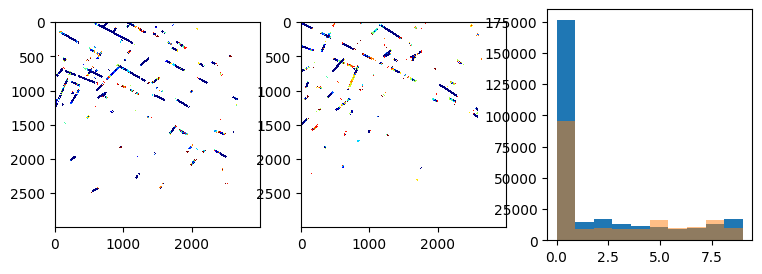

labels0250


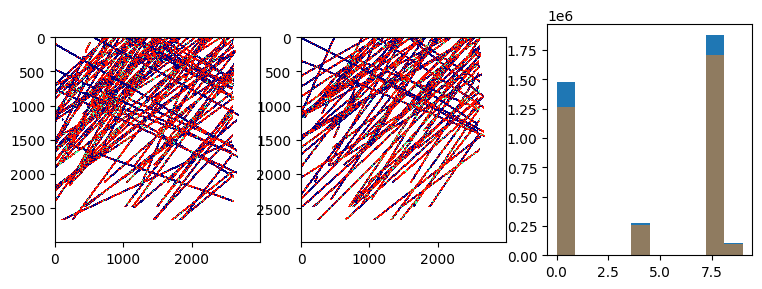

labels0500


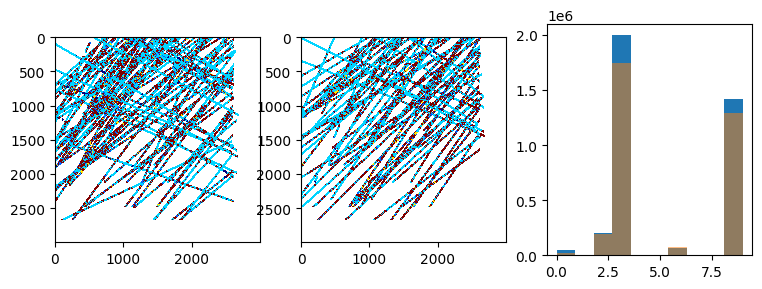

labels1000


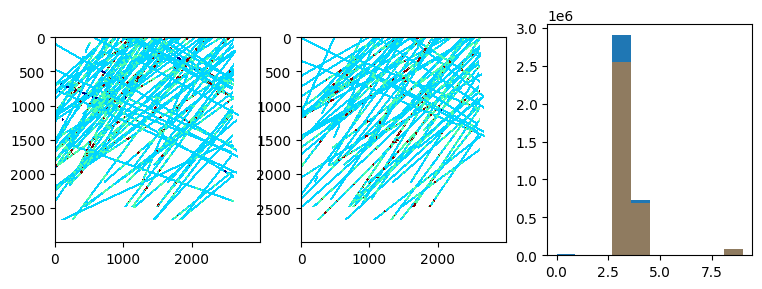

labels2000


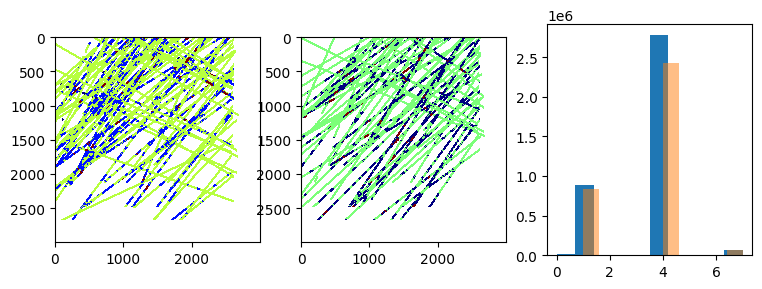

labels4000


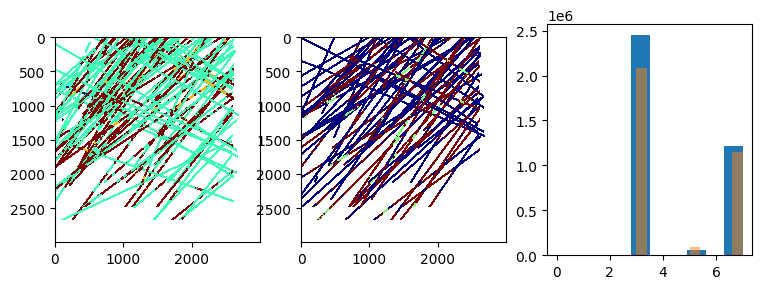

In [52]:
for varname in trn_arrays:
    print(varname)
    trn_array = np.ma.masked_where(trn_arrays[varname] == 255, trn_arrays[varname])
    val_array = np.ma.masked_where(val_arrays[varname] == 255, val_arrays[varname])
    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    axs[0].imshow(trn_array, cmap='jet', interpolation='nearest')
    axs[1].imshow(val_array, cmap='jet', interpolation='nearest')
    axs[2].hist(trn_array.compressed())
    axs[2].hist(val_array.compressed(), alpha=0.5)
    plt.show()


In [28]:
array.shape

(1736, 2582)

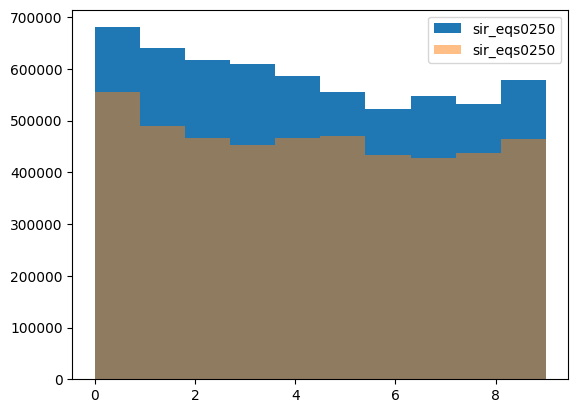

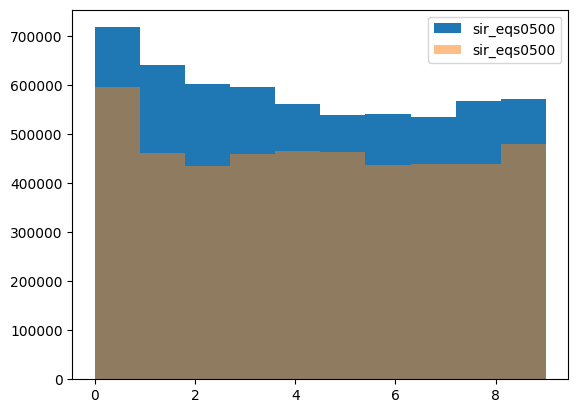

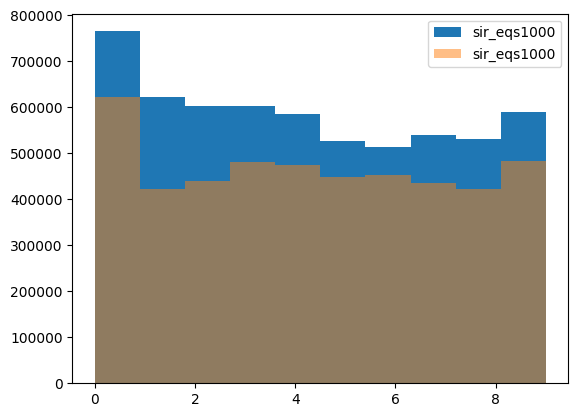

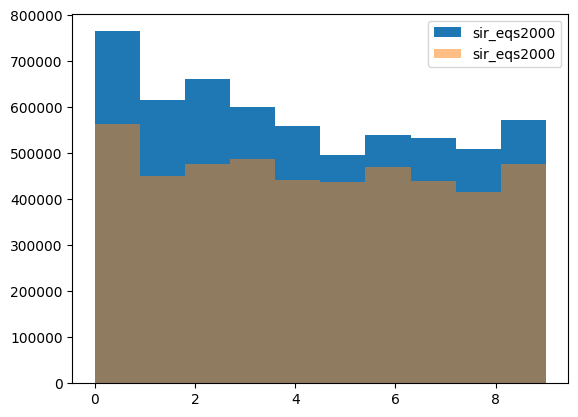

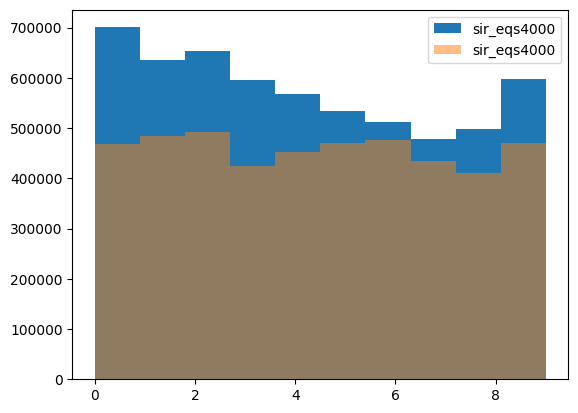

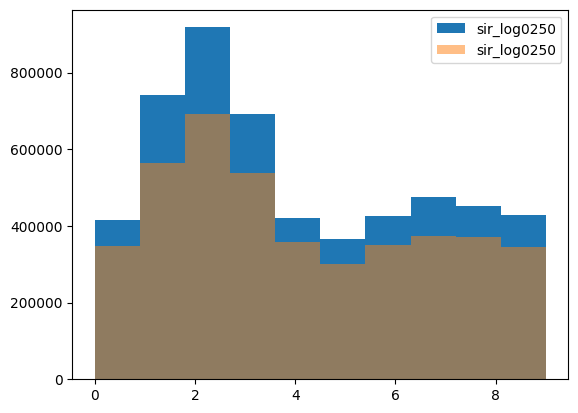

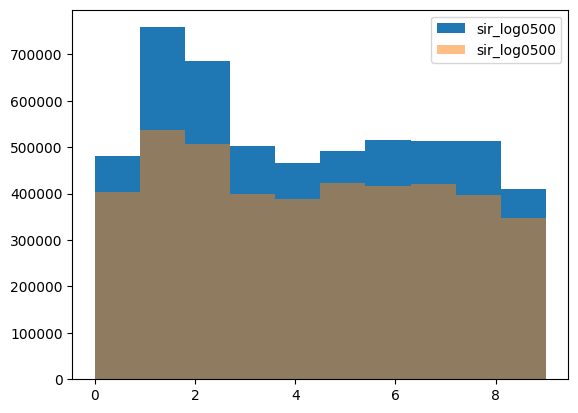

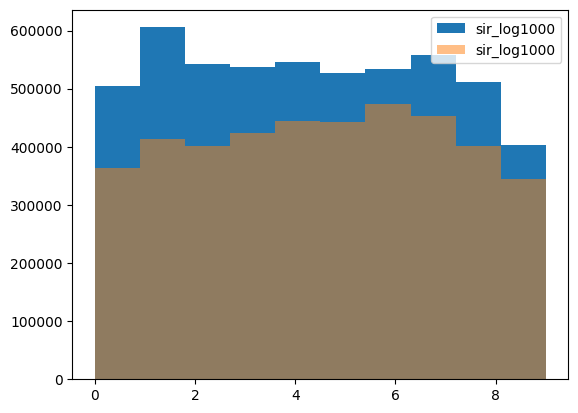

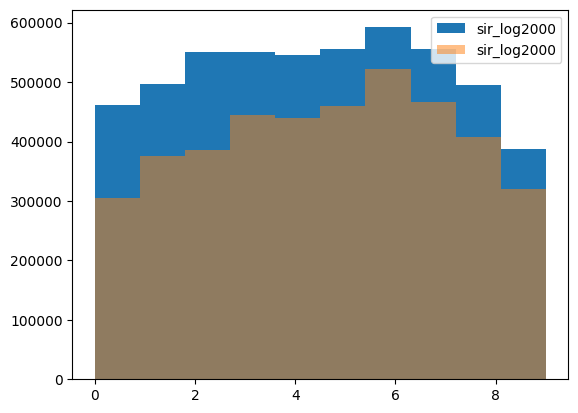

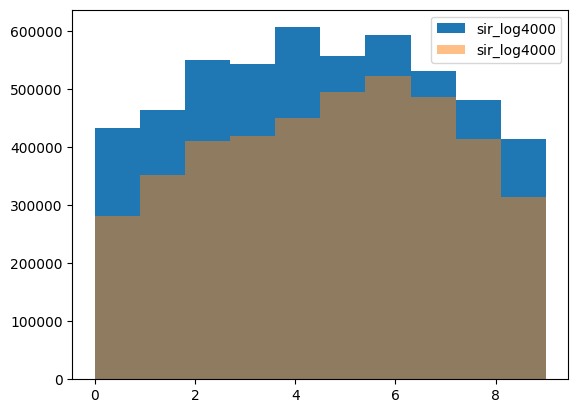

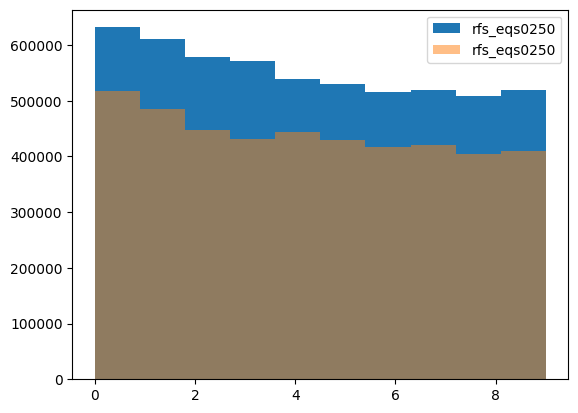

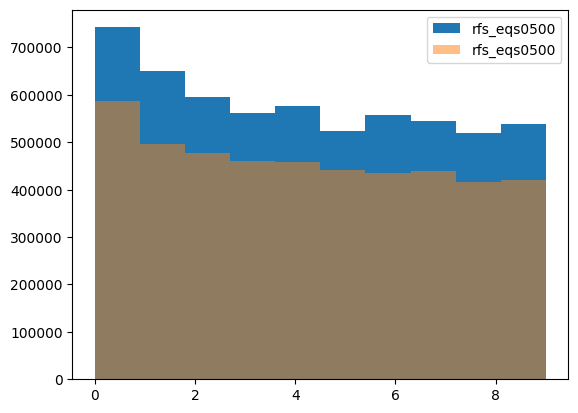

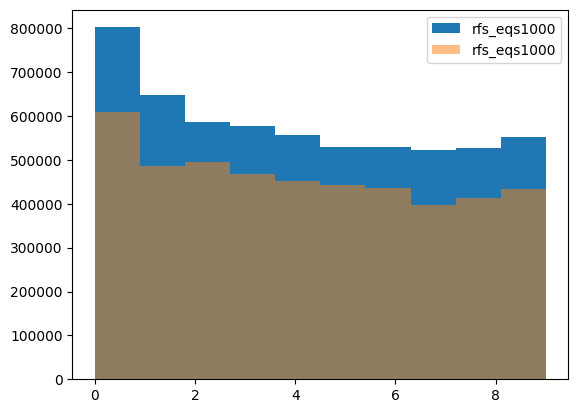

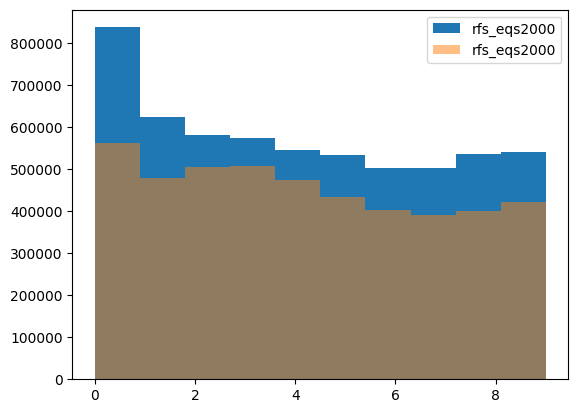

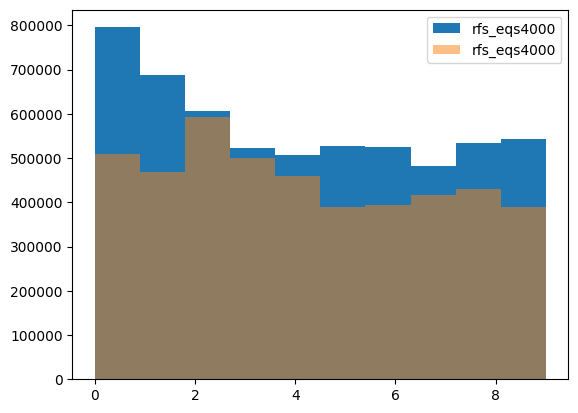

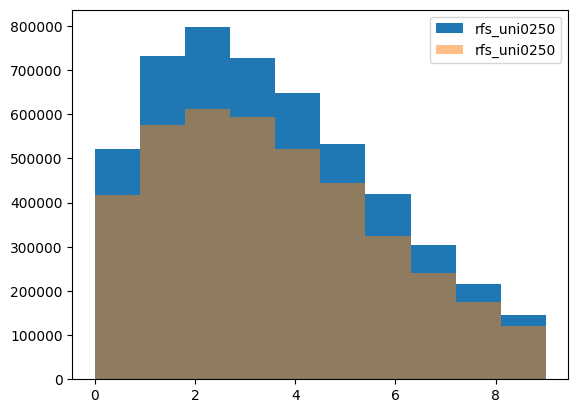

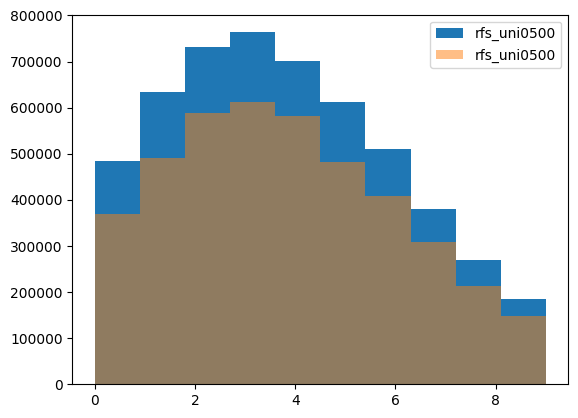

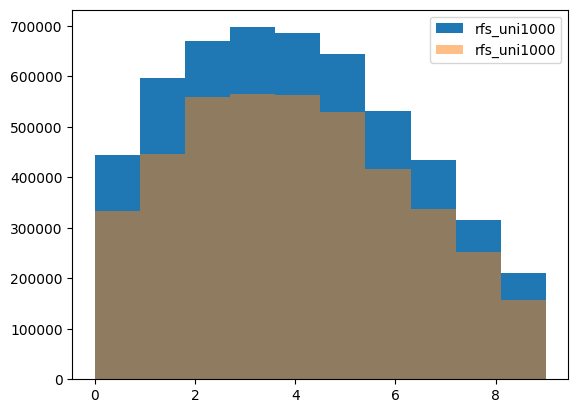

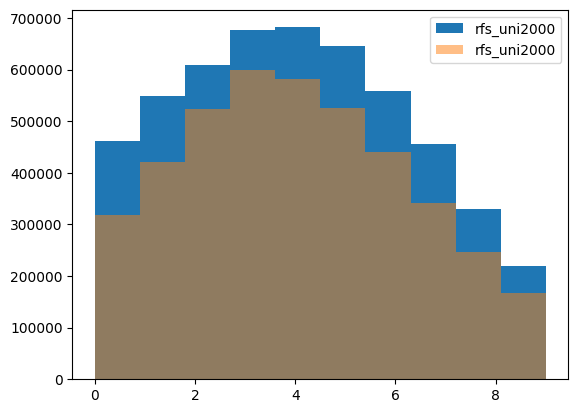

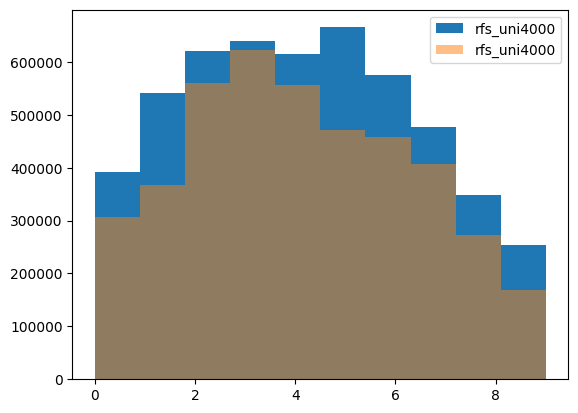

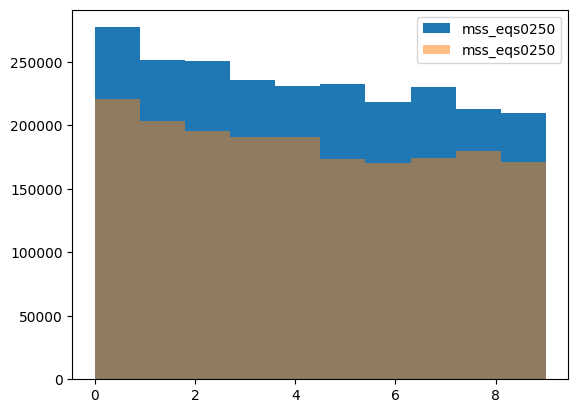

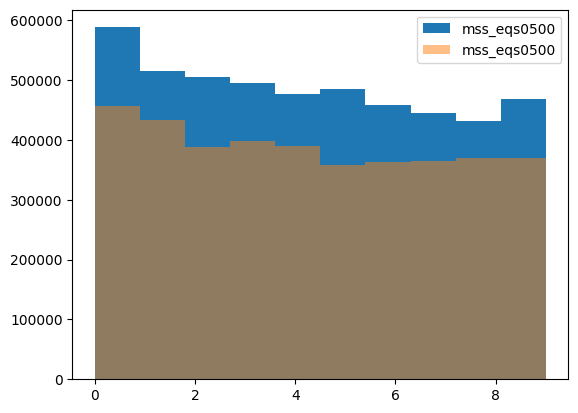

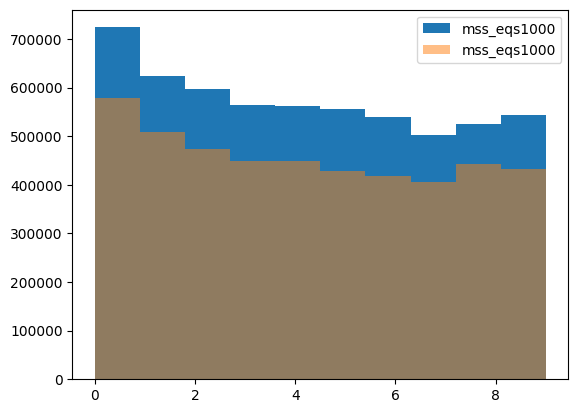

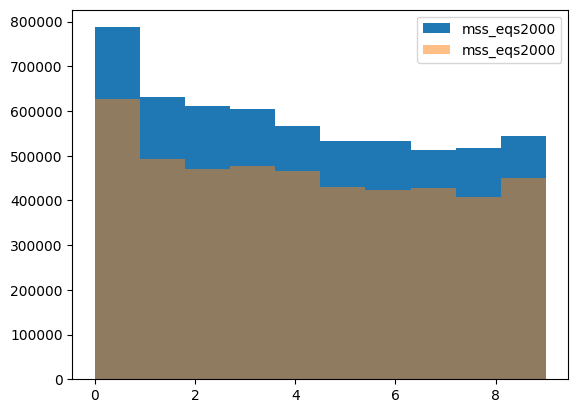

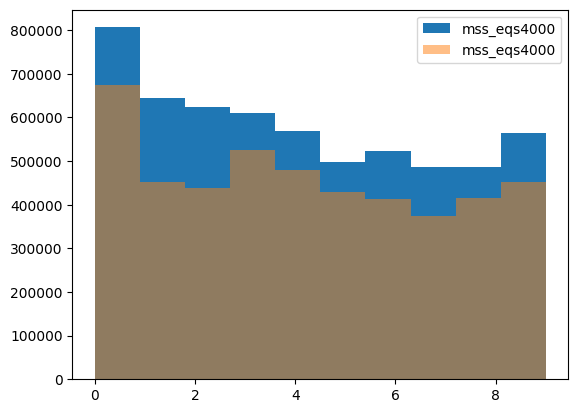

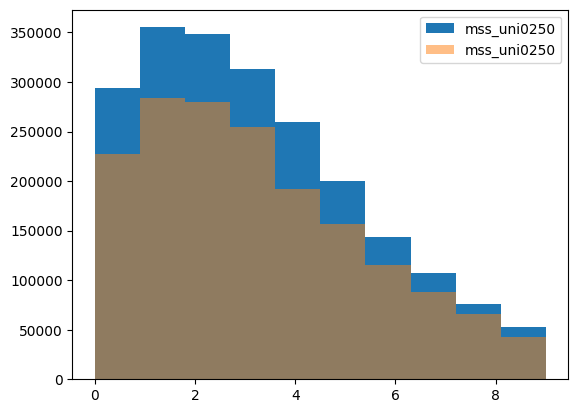

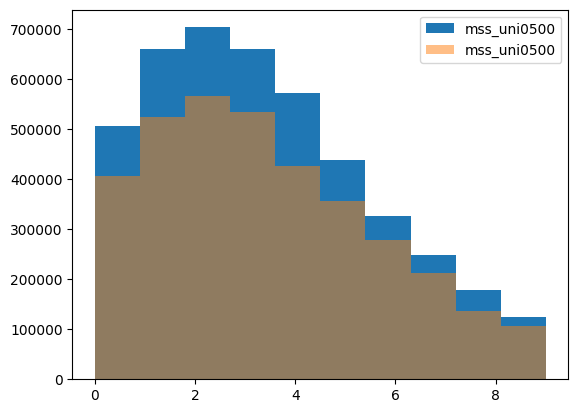

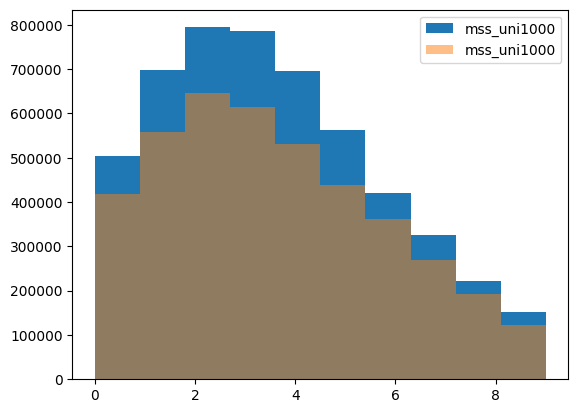

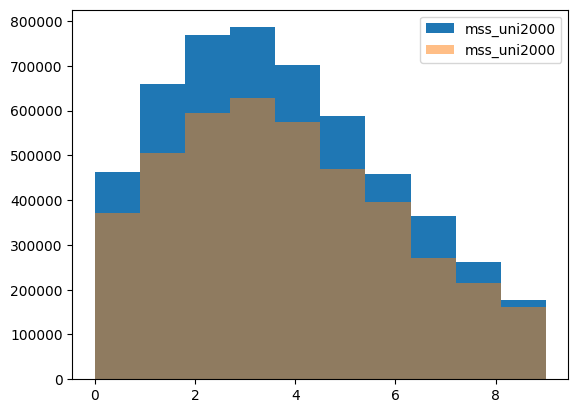

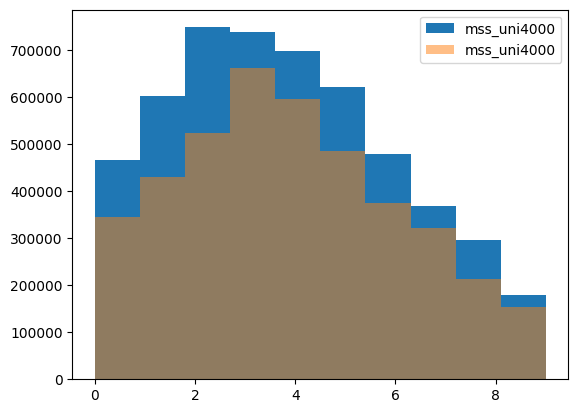

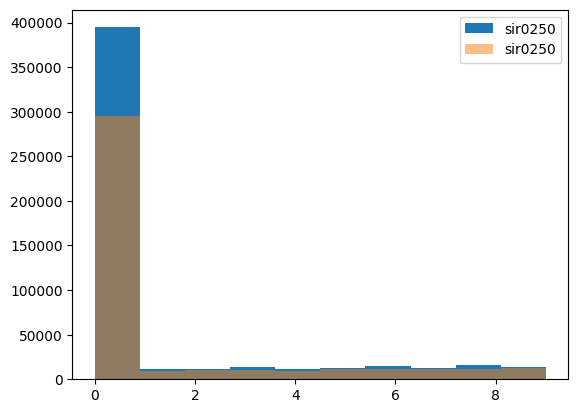

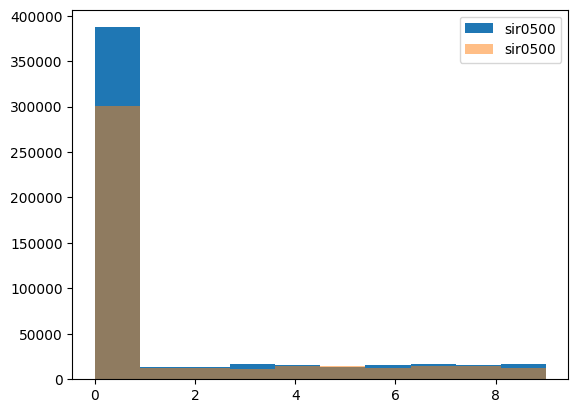

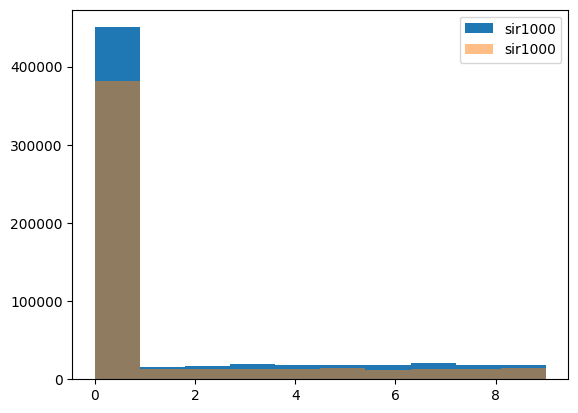

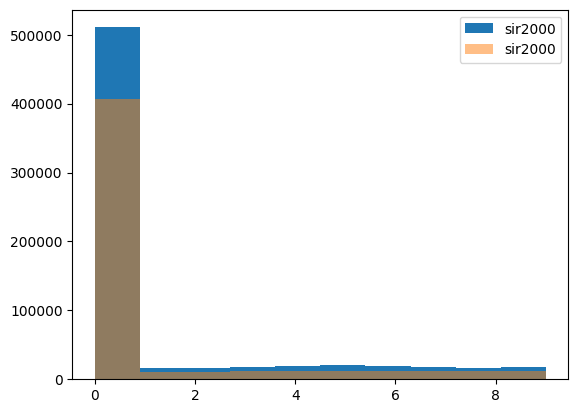

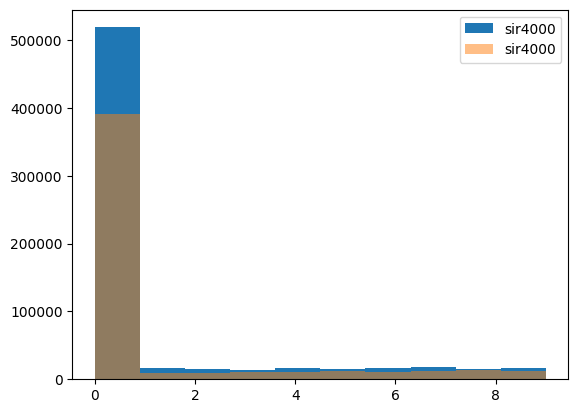

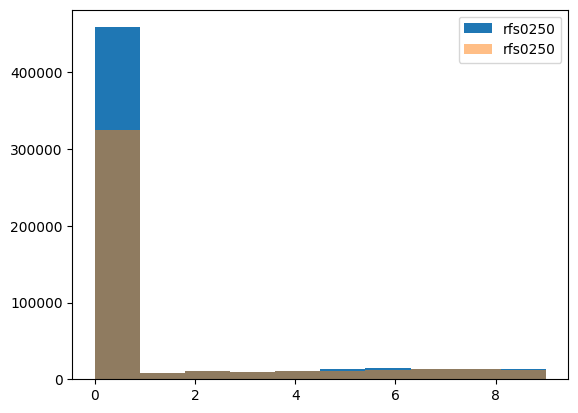

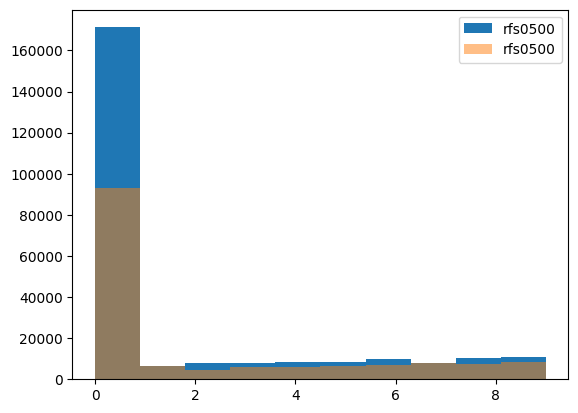

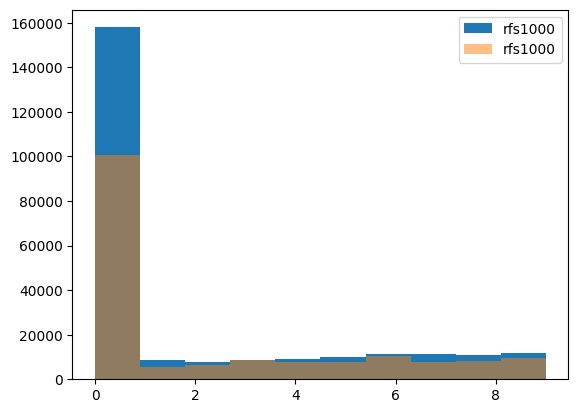

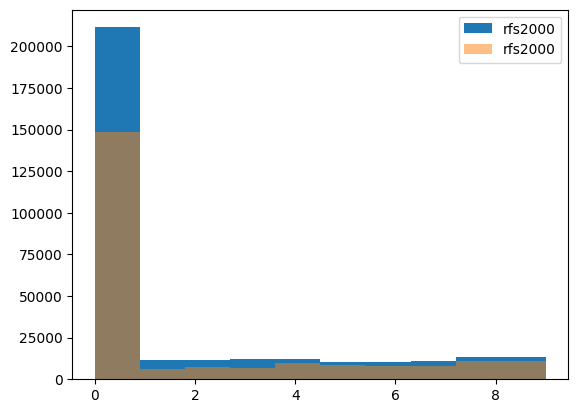

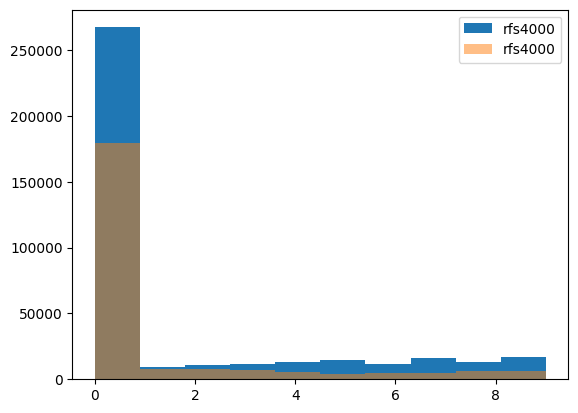

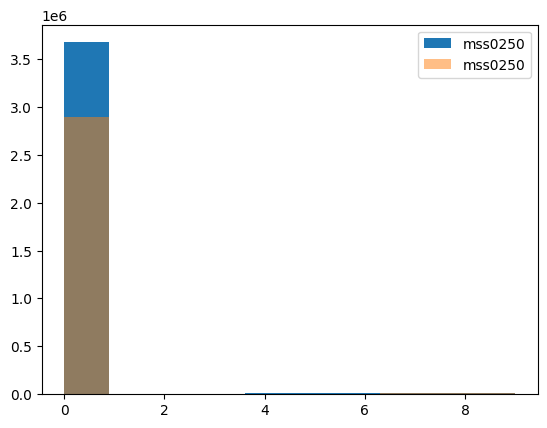

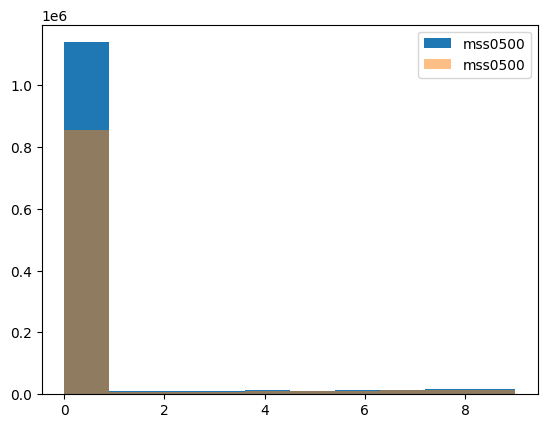

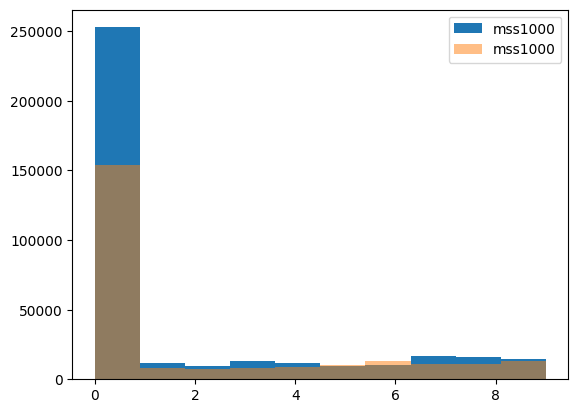

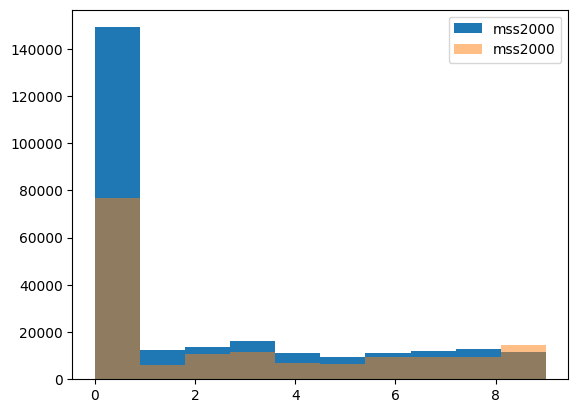

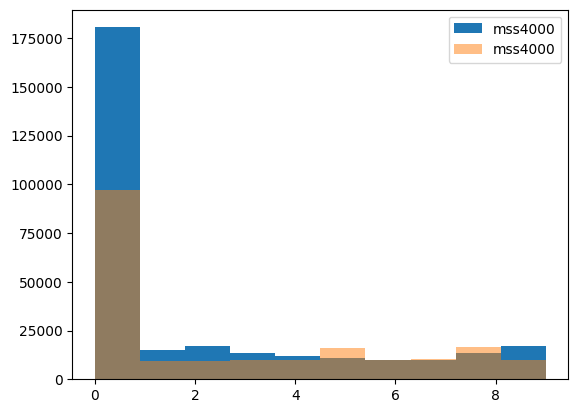

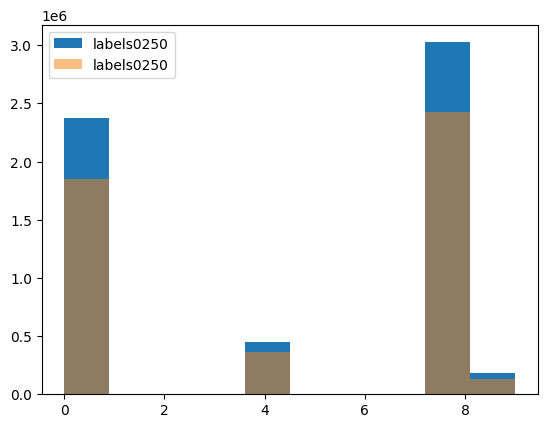

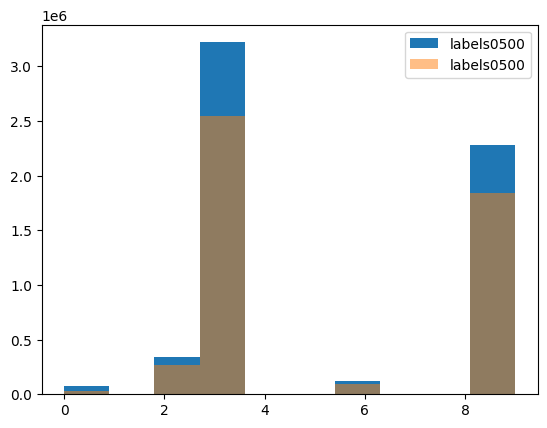

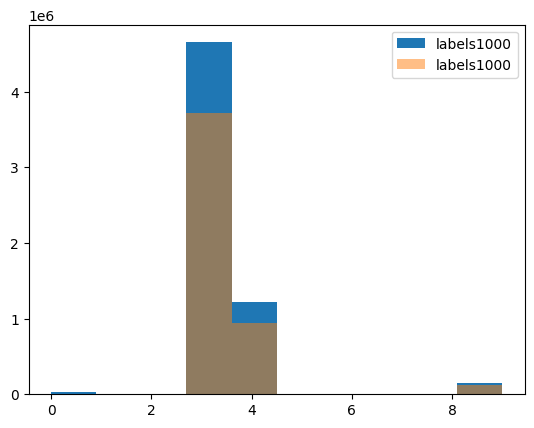

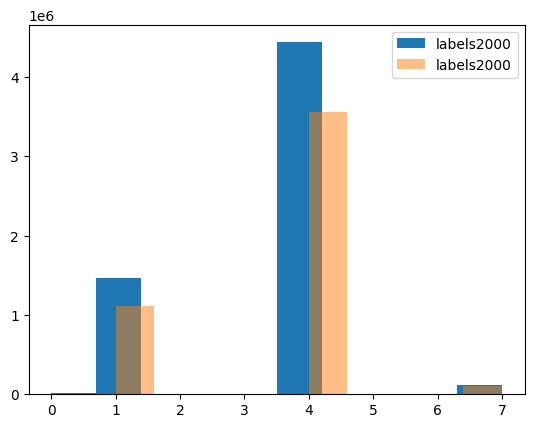

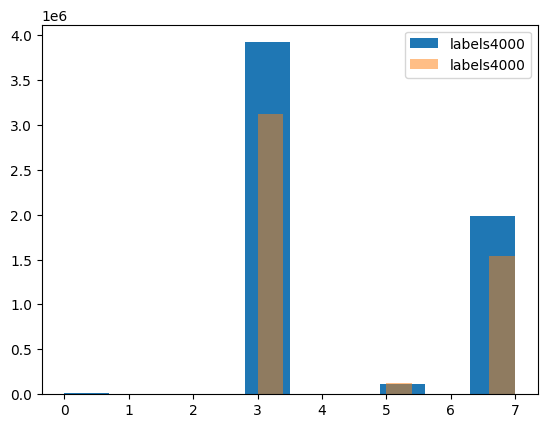

In [24]:
for varname in trn_data.keys():
    plt.hist(trn_data[varname], label=varname)
    plt.hist(val_data[varname], label=varname, alpha=0.5)
    plt.legend()
    plt.show()